In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
import datetime
from datetime import date
from datetime import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
pwd

'C:\\Users\\james\\Desktop'

In [3]:
cd SpringboardWork\ultimate_challenge

C:\Users\james\Desktop\SpringboardWork\ultimate_challenge


In [4]:
# open file and examine
with open("ultimate_data_challenge.json") as datafile1:
    data = json.load(datafile1)
df3 = pd.DataFrame(data)
df3.head()            

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [6]:
#convert dates to datetime objects
df3['signup_date'] = pd.to_datetime(df3['signup_date'])
df3['last_trip_date'] = pd.to_datetime(df3['last_trip_date'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [7]:
# describe data showring that there are missing values for phone, average rating of driver, and average rating by driver
df3.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [8]:
df3

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [9]:
# examine missing values
df3 = df3.sort_values(by='signup_date')
df3[df3['avg_rating_of_driver'].isna()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
4674,Astapor,2,2014-01-01,NaN,1.00,2014-06-28,iPhone,0.0,False,0.0,4.03,4.0
7672,Winterfell,1,2014-01-01,NaN,1.00,2014-01-01,iPhone,0.0,True,100.0,3.39,5.0
1431,Winterfell,0,2014-01-01,NaN,1.00,2014-06-08,iPhone,0.0,True,66.7,9.76,5.0
6055,Astapor,1,2014-01-01,NaN,1.00,2014-01-04,iPhone,0.0,True,0.0,3.09,5.0
6052,Winterfell,1,2014-01-01,NaN,1.00,2014-01-01,iPhone,0.0,False,100.0,6.69,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
25151,Astapor,1,2014-01-31,NaN,1.00,2014-01-31,iPhone,0.0,False,100.0,6.03,5.0
43078,Winterfell,0,2014-01-31,NaN,1.00,2014-03-15,iPhone,0.0,False,0.0,3.00,5.0
46160,Astapor,0,2014-01-31,NaN,1.75,2014-06-18,iPhone,100.0,False,100.0,1.12,5.0
48266,Astapor,1,2014-01-31,NaN,1.00,2014-01-31,iPhone,0.0,False,100.0,10.29,5.0


In [10]:
print(df3['signup_date'].max())
print(df3['signup_date'].min())
print(df3['last_trip_date'].max())
print(df3['last_trip_date'].min())

2014-01-31 00:00:00
2014-01-01 00:00:00
2014-07-01 00:00:00
2014-01-01 00:00:00


In [11]:
#see if nans bunch up on certain days
df3[df3['avg_rating_of_driver'].isna()].groupby('signup_date').count()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
signup_date,,,,,,,,,,,
2014-01-01,338,338,0,338,338,336,338,338,338,338,335
2014-01-02,167,167,0,167,167,167,167,167,167,167,167
2014-01-03,165,165,0,165,165,161,165,165,165,165,163
2014-01-04,212,212,0,212,212,209,212,212,212,212,210
2014-01-05,195,195,0,195,195,193,195,195,195,195,195
2014-01-06,217,217,0,217,217,212,217,217,217,217,216
2014-01-07,258,258,0,258,258,257,258,258,258,258,258
2014-01-08,181,181,0,181,181,179,181,181,181,181,181
2014-01-09,222,222,0,222,222,217,222,222,222,222,218


In [12]:
# try to see if there is a link between missing ratings
print('Both ratings are missing: ', df3[df3['avg_rating_of_driver'].isna()]['avg_rating_by_driver'].isna().sum())
print('Of Driver is missing: ', df3['avg_rating_of_driver'].isna().sum())
print('By Driver is missing: ', df3['avg_rating_by_driver'].isna().sum())

Both ratings are missing:  67
Of Driver is missing:  8122
By Driver is missing:  201


In [13]:
# find average rating of driver and print out the full distribution
print(round(np.mean(df3['avg_rating_of_driver']), 1))
print(np.std(df3['avg_rating_of_driver']))
df3.pivot_table(values ='city', index='avg_rating_of_driver', aggfunc ='count')

4.6
0.6173310853198459


,city
avg_rating_of_driver,
1.0,256
1.5,4
1.6,1
1.7,2
1.8,2
1.9,1
2.0,209
2.1,6
2.2,1


In [14]:
# find average rating by driver and print out the full distribution
print(round(np.mean(df3['avg_rating_by_driver']), 1))
print(np.std(df3['avg_rating_by_driver']))
df3.pivot_table(values ='city', index='avg_rating_by_driver', aggfunc ='count')

4.8
0.4466473088973823


,city
avg_rating_by_driver,
1.0,181
1.5,4
2.0,126
2.3,1
2.5,31
2.7,2
2.8,3
3.0,602
3.2,2


In [15]:
# fill nans with averages from each
df3['avg_rating_of_driver'] = df3['avg_rating_of_driver'].fillna(4.6)
df3['avg_rating_by_driver'] = df3['avg_rating_by_driver'].fillna(4.8)

In [16]:
# I will create a categorical variable to state do not know blank phones
df3['phone'] = df3['phone'].fillna('Unknown')

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 4674 to 30220
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), 

In [18]:
# create variables to help with analysis including days between sign up and last trip for scatter plots
# and create active as a binary for last trip since June 1
df3['month_last_trip'] = df3.last_trip_date.dt.month
df3['days_signup_to_last'] = (df3.last_trip_date - df3.signup_date).dt.days
df3['active'] = df3.last_trip_date.apply(lambda x: 1 if x >= datetime.datetime(2014, 6, 1) else 0)
df3

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,month_last_trip,days_signup_to_last,active
4674,Astapor,2,2014-01-01,4.6,1.00,2014-06-28,iPhone,0.0,False,0.0,4.03,4.0,6,178,1
7672,Winterfell,1,2014-01-01,4.6,1.00,2014-01-01,iPhone,0.0,True,100.0,3.39,5.0,1,0,0
1431,Winterfell,0,2014-01-01,4.6,1.00,2014-06-08,iPhone,0.0,True,66.7,9.76,5.0,6,158,1
15387,Winterfell,2,2014-01-01,5.0,1.00,2014-06-20,Android,0.0,False,54.5,5.03,4.7,6,170,1
17482,Winterfell,0,2014-01-01,3.0,1.50,2014-05-18,iPhone,100.0,False,0.0,3.28,5.0,5,137,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,Astapor,0,2014-01-31,4.0,1.08,2014-04-08,Android,33.3,False,66.7,4.53,5.0,4,67,0
38728,Winterfell,4,2014-01-31,4.5,1.00,2014-03-13,iPhone,0.0,False,80.0,7.90,5.0,3,41,0
43123,King's Landing,0,2014-01-31,5.0,1.18,2014-07-01,iPhone,41.2,True,58.8,1.98,4.6,7,151,1
43127,King's Landing,2,2014-01-31,5.0,1.01,2014-06-27,iPhone,3.0,True,91.0,1.90,4.9,6,147,1


In [19]:
# take a aggregration of month of last trip by phone type
df3.pivot_table(values='city', index=['month_last_trip','phone'], aggfunc='count')

city
month_last_trip phone         
1               Android   3956
                Unknown    130
                iPhone    6061
2               Android   1654
                Unknown     40
                iPhone    2614
3               Android   1695
                Unknown     36
                iPhone    2837
4               Android   1666
                Unknown     20
                iPhone    2902
5               Android   2905
                Unknown     37
                iPhone    4643
6               Android   3058
                Unknown    130
                iPhone   15068
7               Android     88
                Unknown      3
                iPhone     457

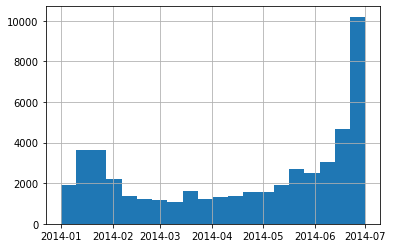

In [20]:
# histogram for last date
df3['last_trip_date'].hist(bins=20)

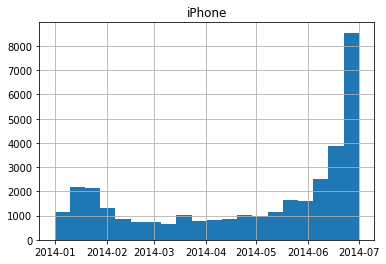

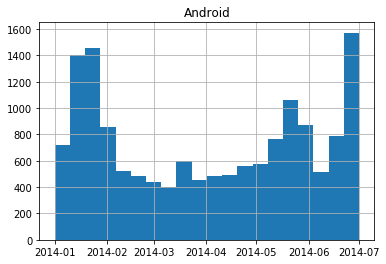

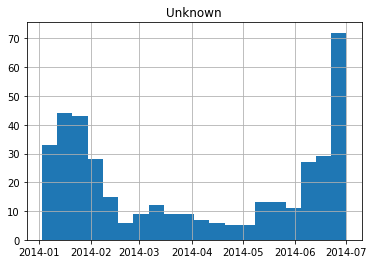

In [21]:
# histogram for phone type
for i in df3.phone.unique():    
    df3['last_trip_date'][df3['phone']==i].hist(bins=20)
    plt.title(i)
    plt.show()

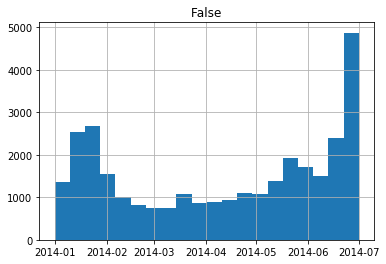

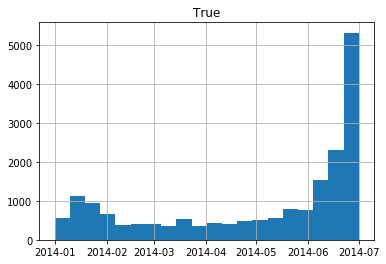

In [22]:
# histogram for ultimate black user
for i in df3.ultimate_black_user.unique():    
    df3['last_trip_date'][df3['ultimate_black_user']==i].hist(bins=20)
    plt.title(i)
    plt.show()

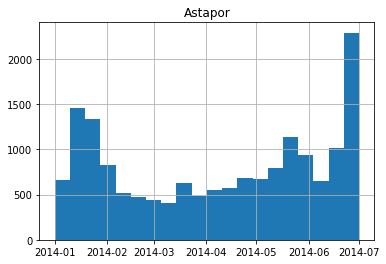

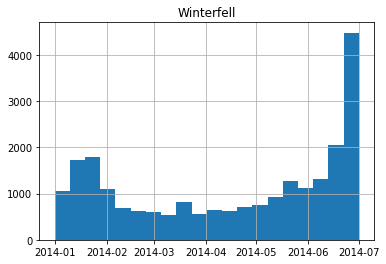

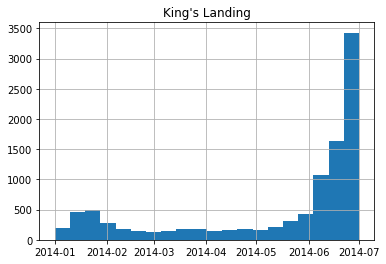

In [23]:
# histogram for city
for i in df3.city.unique():    
    df3['last_trip_date'][df3['city']==i].hist(bins=20)
    plt.title(i)
    plt.show()

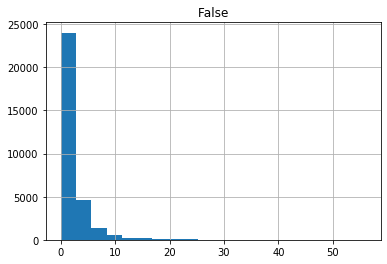

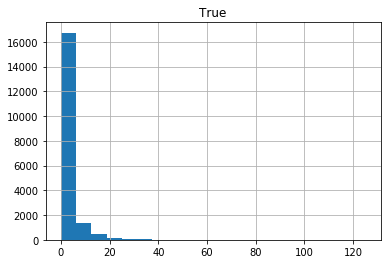

In [24]:
# check out the distribution for trips amongst ultimate black users
for i in df3.ultimate_black_user.unique():    
    df3['trips_in_first_30_days'][df3['ultimate_black_user']==i].hist(bins=20)
    plt.title(i)
    plt.show()

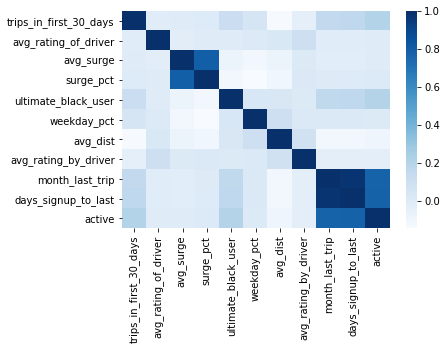

In [25]:
# calculate and plot correlations
dfc = df3.corr()
sns.heatmap(dfc, cmap='Blues')


In [26]:
# examine the correlations
dfc

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,month_last_trip,days_signup_to_last,active
trips_in_first_30_days,1.000000,-0.010861,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039187,0.156932,0.164784,0.210463
avg_rating_of_driver,-0.010861,1.000000,-0.021660,-0.003283,-0.001879,0.012609,0.028373,0.101634,-0.014754,-0.014994,-0.010667
avg_surge,-0.001841,-0.021660,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010578,-0.018330,-0.016809,-0.003333
surge_pct,0.005720,-0.003283,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.020032,0.001864,0.004068,0.011797
ultimate_black_user,0.112210,-0.001879,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009244,0.161932,0.165035,0.205002
weekday_pct,0.050388,0.012609,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020325,0.020416,0.020408,0.009693
avg_dist,-0.136329,0.028373,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.079805,-0.105690,-0.109431,-0.092780
avg_rating_by_driver,-0.039187,0.101634,0.010578,0.020032,0.009244,0.020325,0.079805,1.000000,-0.032458,-0.032771,-0.026828
month_last_trip,0.156932,-0.014754,-0.018330,0.001864,0.161932,0.020416,-0.105690,-0.032458,1.000000,0.981357,0.774031
days_signup_to_last,0.164784,-0.014994,-0.016809,0.004068,0.165035,0.020408,-0.109431,-0.032771,0.981357,1.000000,0.778522


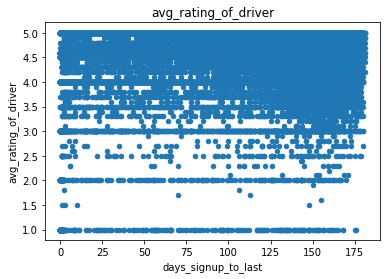

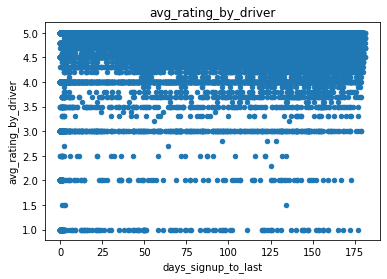

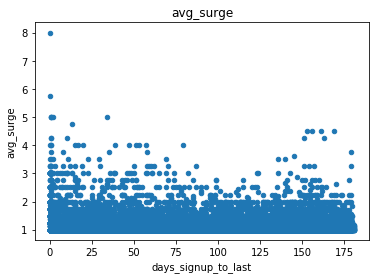

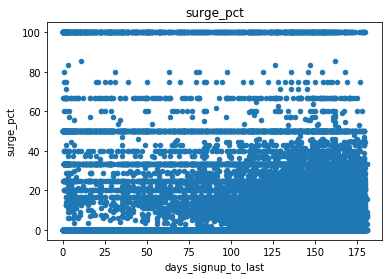

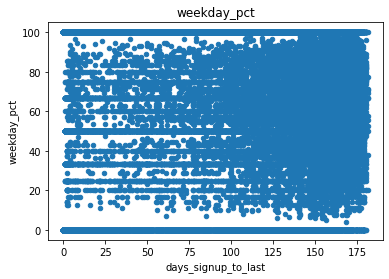

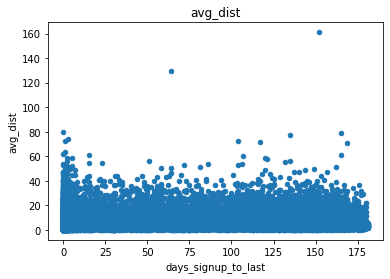

In [27]:
# take scatter plots to visualize relationship between days from sign up to last rip to the following: ratings, surge, weekday pct, avg dist
for i in ['avg_rating_of_driver','avg_rating_by_driver','avg_surge', 'surge_pct','weekday_pct', 'avg_dist']:
    df3.plot.scatter(x='days_signup_to_last', y=i)
    plt.title(i)
    plt.show()

In [28]:
df3

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,month_last_trip,days_signup_to_last,active
4674,Astapor,2,2014-01-01,4.6,1.00,2014-06-28,iPhone,0.0,False,0.0,4.03,4.0,6,178,1
7672,Winterfell,1,2014-01-01,4.6,1.00,2014-01-01,iPhone,0.0,True,100.0,3.39,5.0,1,0,0
1431,Winterfell,0,2014-01-01,4.6,1.00,2014-06-08,iPhone,0.0,True,66.7,9.76,5.0,6,158,1
15387,Winterfell,2,2014-01-01,5.0,1.00,2014-06-20,Android,0.0,False,54.5,5.03,4.7,6,170,1
17482,Winterfell,0,2014-01-01,3.0,1.50,2014-05-18,iPhone,100.0,False,0.0,3.28,5.0,5,137,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,Astapor,0,2014-01-31,4.0,1.08,2014-04-08,Android,33.3,False,66.7,4.53,5.0,4,67,0
38728,Winterfell,4,2014-01-31,4.5,1.00,2014-03-13,iPhone,0.0,False,80.0,7.90,5.0,3,41,0
43123,King's Landing,0,2014-01-31,5.0,1.18,2014-07-01,iPhone,41.2,True,58.8,1.98,4.6,7,151,1
43127,King's Landing,2,2014-01-31,5.0,1.01,2014-06-27,iPhone,3.0,True,91.0,1.90,4.9,6,147,1


In [29]:
# create dummy variables
df31 = pd.get_dummies(df3, drop_first=True)

In [30]:
# convert True False to 1 0
df31['ultimate_black_user'] = df31.ultimate_black_user.apply(lambda x: 1 if x == True else 0)
df31

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,month_last_trip,days_signup_to_last,active,city_King's Landing,city_Winterfell,phone_Unknown,phone_iPhone
4674,2,2014-01-01,4.6,1.00,2014-06-28,0.0,0,0.0,4.03,4.0,6,178,1,0,0,0,1
7672,1,2014-01-01,4.6,1.00,2014-01-01,0.0,1,100.0,3.39,5.0,1,0,0,0,1,0,1
1431,0,2014-01-01,4.6,1.00,2014-06-08,0.0,1,66.7,9.76,5.0,6,158,1,0,1,0,1
15387,2,2014-01-01,5.0,1.00,2014-06-20,0.0,0,54.5,5.03,4.7,6,170,1,0,1,0,0
17482,0,2014-01-01,3.0,1.50,2014-05-18,100.0,0,0.0,3.28,5.0,5,137,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,0,2014-01-31,4.0,1.08,2014-04-08,33.3,0,66.7,4.53,5.0,4,67,0,0,0,0,0
38728,4,2014-01-31,4.5,1.00,2014-03-13,0.0,0,80.0,7.90,5.0,3,41,0,0,1,0,1
43123,0,2014-01-31,5.0,1.18,2014-07-01,41.2,1,58.8,1.98,4.6,7,151,1,1,0,0,1
43127,2,2014-01-31,5.0,1.01,2014-06-27,3.0,1,91.0,1.90,4.9,6,147,1,1,0,0,1


In [31]:
# clean up column title
df31.rename(columns={"city_King's Landing": "city_Kings_Landing"}, inplace=True)

In [32]:
#split data into train and test and test out a few different feature combinations
#X_train, X_test, y_train, y_test = train_test_split(df31[['trips_in_first_30_days','ultimate_black_user','city_Winterfell','city_Kings_Landing','phone_iPhone','phone_Unknown']], df31['active'])
#X_train, X_test, y_train, y_test = train_test_split(df31[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'city_Kings_Landing', 'city_Winterfell', 'phone_Unknown', 'phone_iPhone']], df31['active'])
#X_train, X_test, y_train, y_test = train_test_split(df31[['ultimate_black_user','city_Winterfell','city_Kings_Landing','phone_iPhone','phone_Unknown']], df31['active'])
X_train, X_test, y_train, y_test = train_test_split(df31[['trips_in_first_30_days','city_Winterfell','city_Kings_Landing','phone_iPhone','phone_Unknown']], df31['active'])

In [33]:
# call the Logistic Regression
LogReg = LogisticRegression(max_iter=500)


In [34]:
# fit on the train set
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred = LogReg.predict(X_test)

In [36]:
ascore = LogReg.score(X_test, y_test)

In [37]:
ascore

0.7128

In [38]:
# calculate % retained
percentage_retained = np.sum(df31['active'])/len(df31['active'])
percentage_retained

0.37608

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80      7816
           1       0.70      0.41      0.52      4684

    accuracy                           0.71     12500
   macro avg       0.71      0.65      0.66     12500
weighted avg       0.71      0.71      0.69     12500



In [40]:
print(confusion_matrix(y_test, y_pred))

[[6981  835]
 [2755 1929]]


In [41]:
print(accuracy_score(y_test, y_pred))

0.7128
